QAOA

In [4]:
# import
import math
import time
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from qiskit import *
from qiskit import Aer
from qiskit.opflow import Z,I
from qiskit.algorithms.optimizers import COBYLA
from qiskit.visualization import plot_histogram as ph
from qiskit.algorithms import QAOA
from qiskit.utils import algorithm_globals, QuantumInstance

C:\Users\Newt\AppData\Local\Temp\ipykernel_5208\763438461.py:4: DeprecationWarning: The class ``qiskit.algorithms.minimum_eigen_solvers.qaoa.QAOA`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. Instead, use the class ``qiskit.algorithms.minimum_eigensolvers.QAOA``. See https://qisk.it/algo_migration for a migration guide.
  qaoa = QAOA(reps = 1)


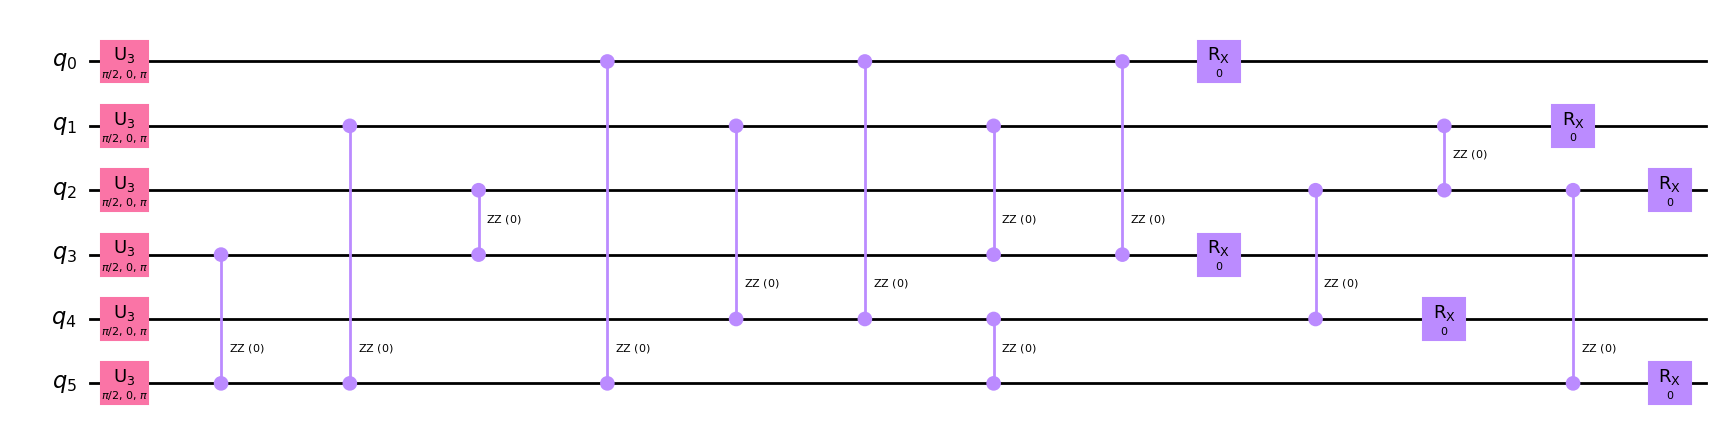

In [15]:
H1 = (Z^I^Z^I^I^I) + (Z^I^I^I^Z^I) + (Z^I^I^I^I^Z) + (I^Z^I^I^Z^I) + (I^Z^I^I^I^Z) + (Z^Z^I^I^I^I) +\
     (I^I^Z^Z^I^I) + (I^I^Z^I^Z^I) + (I^I^Z^I^I^Z) + (I^Z^I^Z^I^I) + (I^I^I^Z^Z^I) + (Z^I^I^Z^I^I)

qaoa = QAOA(reps = 1)
circuit = qaoa.construct_circuit([0,0],H1)[0]
circuit.decompose().decompose().draw(output="mpl")

In [18]:
seed = 4096
algorithm_globals.random_seed = seed
quantum_instance = QuantumInstance(Aer.get_backend("aer_simulator"),
seed_simulator=seed, seed_transpiler=seed,shots = 2048)
qaoa = QAOA(optimizer = COBYLA(), quantum_instance=quantum_instance)
result = qaoa.compute_minimum_eigenvalue(H1)

b0, y0 = result.optimal_point[0], result.optimal_point[1]
print(result)

C:\Users\Newt\AppData\Local\Temp\ipykernel_5208\1857948234.py:3: DeprecationWarning: The class ``qiskit.utils.quantum_instance.QuantumInstance`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/qi_migration.
  quantum_instance = QuantumInstance(Aer.get_backend("aer_simulator"),
C:\Users\Newt\AppData\Local\Temp\ipykernel_5208\1857948234.py:5: DeprecationWarning: The class ``qiskit.algorithms.minimum_eigen_solvers.qaoa.QAOA`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. Instead, use the class ``qiskit.algorithms.minimum_eigensolvers.QAOA``. See https://qisk.it/algo_migration for a migration guide.
  qaoa = QAOA(optimizer = COBYLA(), quantum_instance=quantum_instance)


{   'aux_operator_eigenvalues': None,
    'cost_function_evals': 34,
    'eigenstate': {   '000000': 0.02209708691207961,
                      '000001': 0.03125,
                      '000010': 0.03125,
                      '000011': 0.10597390598633231,
                      '000100': 0.03125,
                      '000101': 0.09110862335695782,
                      '000110': 0.08838834764831845,
                      '000111': 0.24407030237208294,
                      '001001': 0.03125,
                      '001010': 0.08838834764831845,
                      '001011': 0.1767766952966369,
                      '001100': 0.10126157341262282,
                      '001101': 0.17258376589355096,
                      '001110': 0.11899645477912357,
                      '001111': 0.125,
                      '010000': 0.02209708691207961,
                      '010001': 0.04419417382415922,
                      '010010': 0.07654655446197431,
                      '010011': 0.178152

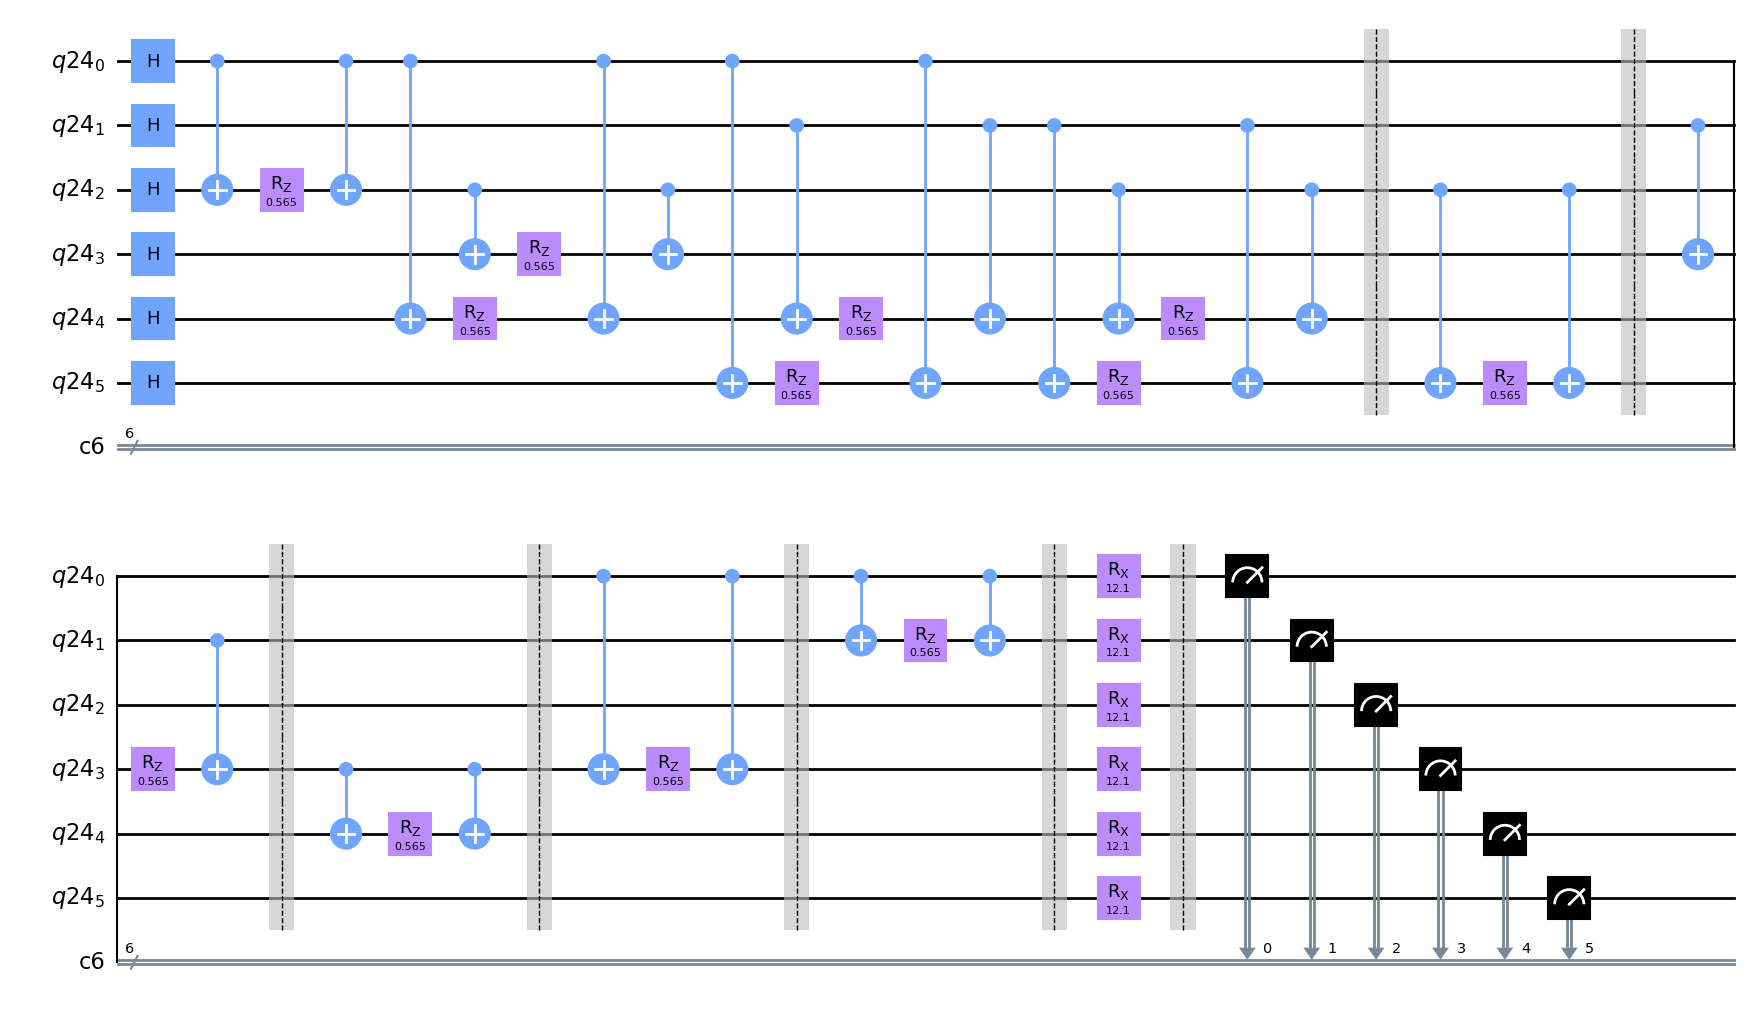

In [19]:
n=6
pi = math.pi
q=QuantumRegister(n)
c=ClassicalRegister(n)
qc=QuantumCircuit(q,c)

a, y=b0*2, y0*2

for i in range(n):
    qc.h(i)

qc.cx(0,2)
qc.rz(a,2)
qc.cx(0,2)

qc.cx(0,4)
qc.rz(a,4)
qc.cx(0,4)

qc.cx(0,5)
qc.rz(a,5)
qc.cx(0,5)

qc.cx(1,4)
qc.rz(a,4)
qc.cx(1,4)

qc.cx(1,5)
qc.rz(a,5)
qc.cx(1,5)

qc.cx(2,3)
qc.rz(a,3)
qc.cx(2,3)

qc.cx(2,4)
qc.rz(a,4)
qc.cx(2,4)

qc.barrier()

qc.cx(2,5)
qc.rz(a,5)
qc.cx(2,5)

qc.barrier()

qc.cx(1,3)
qc.rz(a,3)
qc.cx(1,3)

qc.barrier()

qc.cx(3,4)
qc.rz(a,4)
qc.cx(3,4)

qc.barrier()

qc.cx(0,3)
qc.rz(a,3)
qc.cx(0,3)

qc.barrier()

qc.cx(0,1)
qc.rz(a,1)
qc.cx(0,1)

qc.barrier()

for i in range(n):
    qc.rx(y,i)

qc.barrier()

for i in range(n):
  qc.measure(q[i],c[i])

qc.draw(output="mpl")

In [20]:
sim = Aer.get_backend('aer_simulator')

res=execute(qc, backend=sim).result()

res.get_counts()

{'101100': 42,
 '110100': 33,
 '000011': 14,
 '111011': 4,
 '100101': 24,
 '001110': 36,
 '111010': 8,
 '100110': 34,
 '001111': 8,
 '011100': 23,
 '101000': 7,
 '100000': 8,
 '010110': 41,
 '110000': 9,
 '000111': 62,
 '111101': 1,
 '001100': 9,
 '100011': 20,
 '111001': 19,
 '100100': 1,
 '001101': 25,
 '111100': 22,
 '001010': 6,
 '100001': 6,
 '111111': 7,
 '100010': 3,
 '001011': 29,
 '010011': 28,
 '000101': 10,
 '110010': 27,
 '101110': 17,
 '111000': 67,
 '101001': 43,
 '101111': 2,
 '110001': 49,
 '000110': 14,
 '010101': 30,
 '010111': 6,
 '011001': 32,
 '001001': 23,
 '011010': 24,
 '110101': 4,
 '000010': 4,
 '101011': 9,
 '101010': 26,
 '110110': 25,
 '010001': 15,
 '000100': 4,
 '101101': 12,
 '110011': 6,
 '010100': 7,
 '011110': 7,
 '110111': 2,
 '000000': 5,
 '011111': 6,
 '010010': 9,
 '011011': 1,
 '011000': 4,
 '100111': 3,
 '001000': 1,
 '010000': 1}

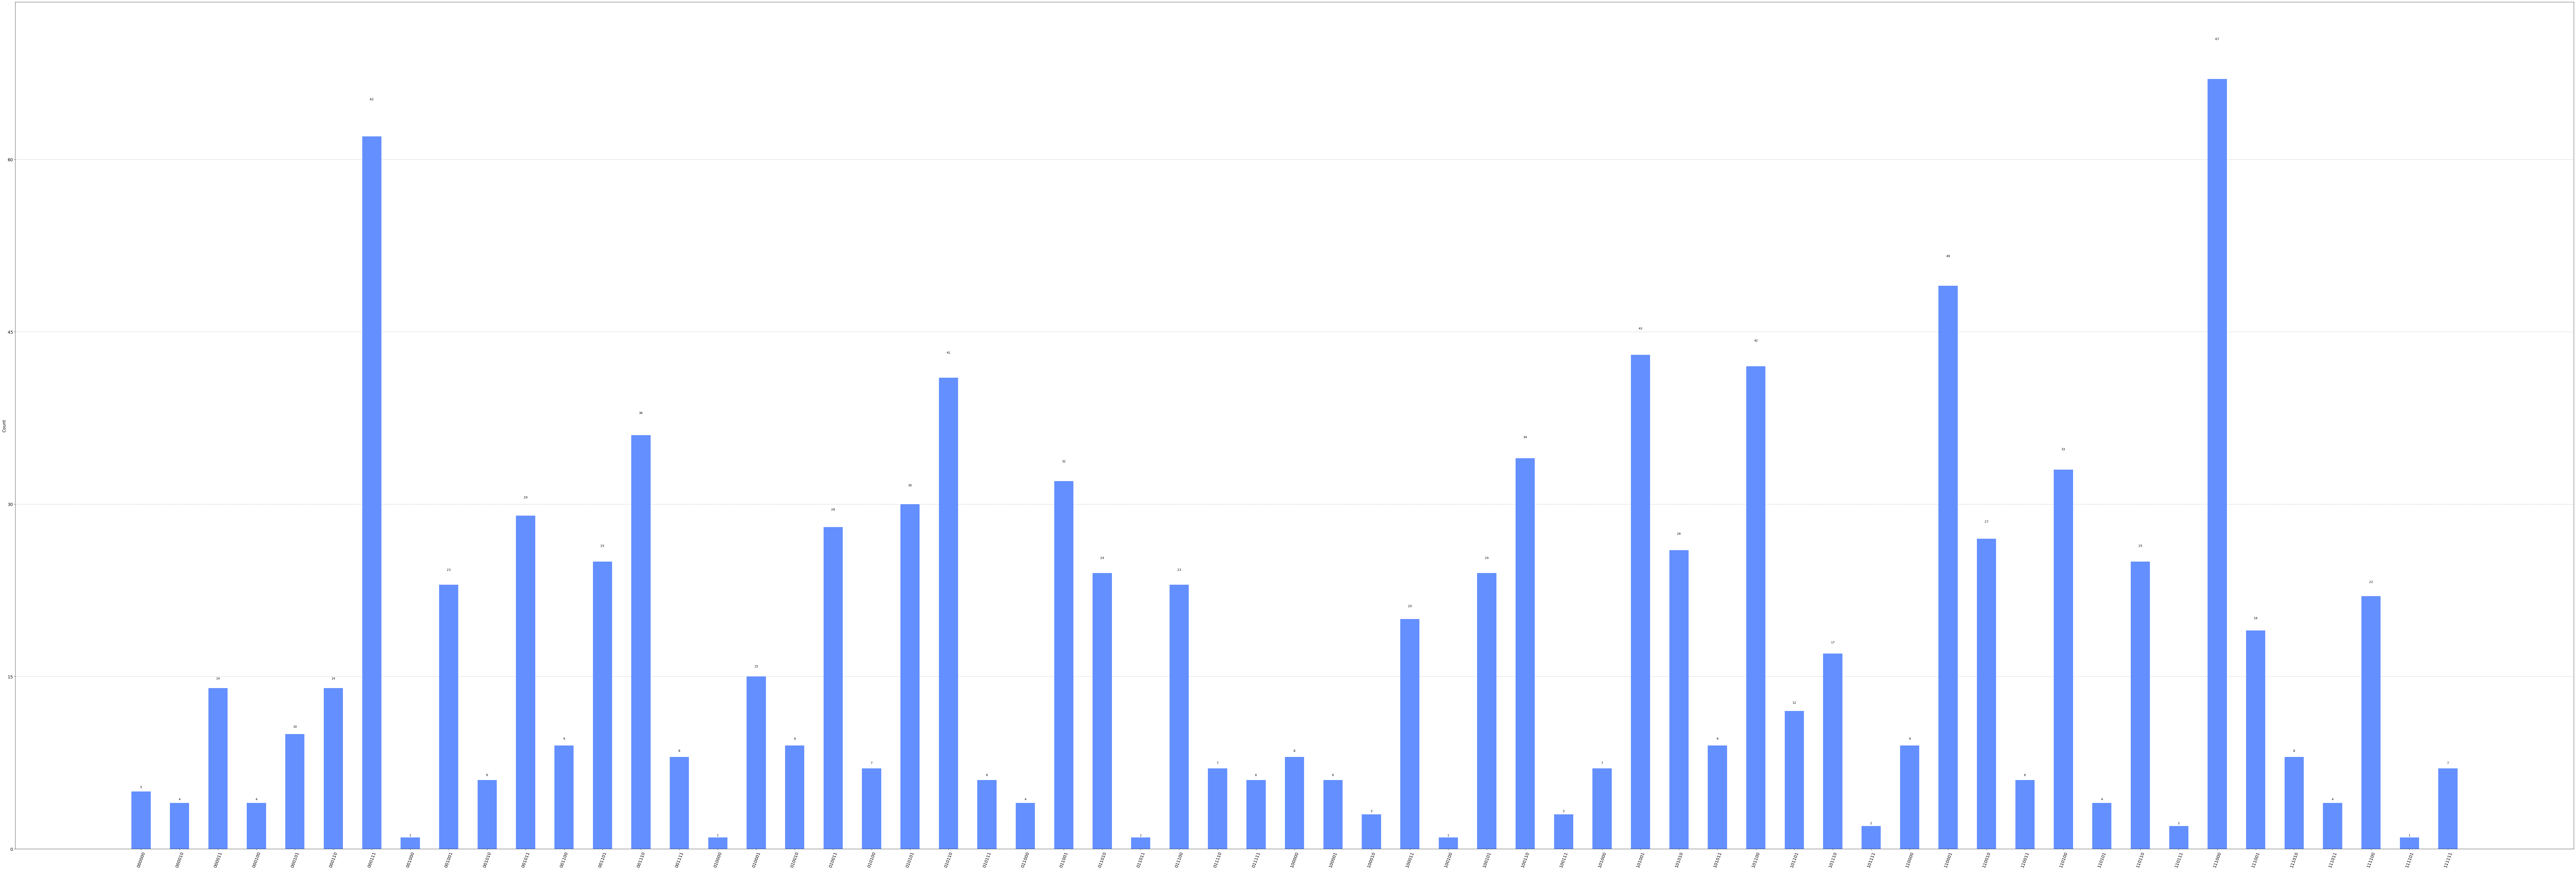

In [21]:
ph(res.get_counts(qc),figsize=(150,50))

Classical

[[0. 1. 1. 1. 1. 1.]
 [1. 0. 0. 1. 1. 1.]
 [1. 0. 0. 1. 1. 1.]
 [1. 1. 1. 0. 1. 0.]
 [1. 1. 1. 1. 0. 0.]
 [1. 1. 1. 0. 0. 0.]]
case = [0, 0, 0, 0, 0, 0] cost = 0.0
case = [1, 0, 0, 0, 0, 0] cost = 5.0
case = [0, 1, 0, 0, 0, 0] cost = 4.0
case = [1, 1, 0, 0, 0, 0] cost = 7.0
case = [0, 0, 1, 0, 0, 0] cost = 4.0
case = [1, 0, 1, 0, 0, 0] cost = 7.0
case = [0, 1, 1, 0, 0, 0] cost = 8.0
case = [1, 1, 1, 0, 0, 0] cost = 9.0
case = [0, 0, 0, 1, 0, 0] cost = 4.0
case = [1, 0, 0, 1, 0, 0] cost = 7.0
case = [0, 1, 0, 1, 0, 0] cost = 6.0
case = [1, 1, 0, 1, 0, 0] cost = 7.0
case = [0, 0, 1, 1, 0, 0] cost = 6.0
case = [1, 0, 1, 1, 0, 0] cost = 7.0
case = [0, 1, 1, 1, 0, 0] cost = 8.0
case = [1, 1, 1, 1, 0, 0] cost = 7.0
case = [0, 0, 0, 0, 1, 0] cost = 4.0
case = [1, 0, 0, 0, 1, 0] cost = 7.0
case = [0, 1, 0, 0, 1, 0] cost = 6.0
case = [1, 1, 0, 0, 1, 0] cost = 7.0
case = [0, 0, 1, 0, 1, 0] cost = 6.0
case = [1, 0, 1, 0, 1, 0] cost = 7.0
case = [0, 1, 1, 0, 1, 0] cost = 8.0
case = [1, 1, 1, 0, 1,

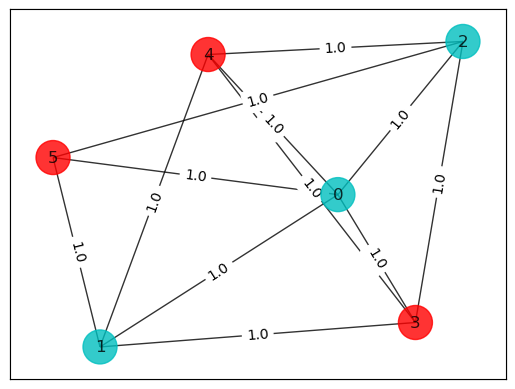

In [14]:
sum_time = 0.0

start_time = time.perf_counter()

n = 6  # Number of nodes in graph
G = nx.Graph()
G.add_nodes_from(np.arange(0, n, 1))

elist = [(0, 2, 1.0), (0, 4, 1.0), (0, 5, 1.0), (1, 4, 1.0), (3, 4, 1.0),(0, 3, 1.0),
        (1, 5, 1.0), (2, 3, 1.0), (2, 4, 1.0), (2, 5, 1.0), (1, 3, 1.0),(0, 1, 1.0)]

# tuple is (i,j,weight) where (i,j) is the edge
G.add_weighted_edges_from(elist)

colors = ["r" for node in G.nodes()]
pos = nx.spring_layout(G)


def draw_graph(G, colors, pos):
    default_axes = plt.axes(frameon=True)
    nx.draw_networkx(G, node_color=colors, node_size=600, alpha=0.8, ax=default_axes, pos=pos)
    edge_labels = nx.get_edge_attributes(G, "weight")
    nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels)


draw_graph(G, colors, pos)

# Computing the weight matrix from the random graph
w = np.zeros([n, n])
for i in range(n):
    for j in range(n):
        temp = G.get_edge_data(i, j, default=0)
        if temp != 0:
            w[i, j] = temp["weight"]
print(w)

best_cost_brute = 0
for b in range(2**n):
    x = [int(t) for t in reversed(list(bin(b)[2:].zfill(n)))]
    cost = 0
    for i in range(n):
        for j in range(n):
            cost = cost + w[i, j] * x[i] * (1 - x[j])
    if best_cost_brute < cost:
        best_cost_brute = cost
        xbest_brute = x
    print("case = " + str(x) + " cost = " + str(cost))

colors = ["r" if xbest_brute[i] == 0 else "c" for i in range(n)]
draw_graph(G, colors, pos)
print("\nBest solution = " + str(xbest_brute) + " cost = " + str(best_cost_brute))

end_time = time.perf_counter()
elapsed_time = end_time - start_time

#print(f"Elapsed time: {elapsed_time:.6f} seconds")
sum_time += elapsed_time

print(f"Average time: {sum_time/1:.6f} seconds")
